# Análise exploratória dos dados
_EDA - Exploratory Data Analysis_

## 1. Importação de bibliotecas

In [81]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno
import warnings
import gc

In [82]:
# Configurações para exibição de dados no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento das bases

In [83]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 54925


In [84]:
# Criando um dataframe a partir do arquivo train.csv
df_train = pd.read_csv('dados/train.csv', sep=',')
print('\nDATAFRAME: df_train')
df_train.head()


DATAFRAME: df_train


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [85]:
# Criando um dataframe a partir do arquivo test.csv
df_test = pd.read_csv('dados/test.csv', sep=',')
print('\nDATAFRAME: df_test')
df_test.head()


DATAFRAME: df_test


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [86]:
# Criando um dataframe a partir do arquivo store.csv
df_store = pd.read_csv('dados/store.csv', sep=',')
print('\nDATAFRAME: df_store')
df_store.head()


DATAFRAME: df_store


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


## 3. Análise dos dataframes

In [87]:
# Exibindo a quantidade de linhas e colunas dos dataframes

# Criação de um dicionário com os dataframes e seus respectivos nomes
dfs = {
    'df_train': df_train,
    'df_test': df_test,
    'df_store': df_store
}

# Iteração sobre o dicionário para exibir o nome e as dimensões dos dataframes
print(f'\nVOLUMETRIA')
for nome, df in dfs.items():
    print(f'\n{nome}')
    print(f'-'*45)
    print(f'Quantidade de linhas (registros):  {df.shape[0]}')
    print(f'Quantidade de colunas (variáveis): {df.shape[1]}')    


VOLUMETRIA

df_train
---------------------------------------------
Quantidade de linhas (registros):  1017209
Quantidade de colunas (variáveis): 9

df_test
---------------------------------------------
Quantidade de linhas (registros):  41088
Quantidade de colunas (variáveis): 8

df_store
---------------------------------------------
Quantidade de linhas (registros):  1115
Quantidade de colunas (variáveis): 10


In [88]:
# Unindo df_train com df_store
df = pd.merge(df_train, df_store, on='Store', how='left')

# Exibindo o dataframe final resultante da junção
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [89]:
# Função para geração de um dataframe de metadados

def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.
    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [90]:
# Exibindo os metadados do dataframe unificado

gerar_metadados(df)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Promo2SinceWeek,float64,508031,49.94,24
1,PromoInterval,object,508031,49.94,3
2,Promo2SinceYear,float64,508031,49.94,7
3,CompetitionOpenSinceYear,float64,323348,31.79,23
4,CompetitionOpenSinceMonth,float64,323348,31.79,12
5,CompetitionDistance,float64,2642,0.26,654
6,DayOfWeek,int64,0,0.00,7
7,Store,int64,0,0.00,1115
8,Date,object,0,0.00,942
9,Sales,int64,0,0.00,21734


In [91]:
# Efetuando as conversões necessárias da tipagem dos dados

# Transforma para o tipo de dados datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year_Month'] = df['Date'].dt.strftime('%Y%m')

## 4. Análise exploratória dos dados

In [92]:
# Função para simplificar a visualização de grandes números
def formatar_milhoes(x, _):
    if x >= 1e6:
        return f'{x / 1e6:.1f}M'
    elif x >= 1e3:
        return f'{x / 1e3:.1f}K'
    else:
        return str(int(x))

In [93]:
# Função para formatar os rótulos das barras
def formatar_valores(val):
    if val >= 1e6:
        return f'{val / 1e6:.1f}M'
    elif val >= 1e3:
        return f'{val / 1e3:.1f}K'
    else:
        return str(int(val))

### 4.1. Quantidade de vendas por mês

In [94]:
# Agrupando quantidade de vendas por Mês/Ano
df_00 = df.groupby('Year_Month')['Sales'].sum().reset_index()

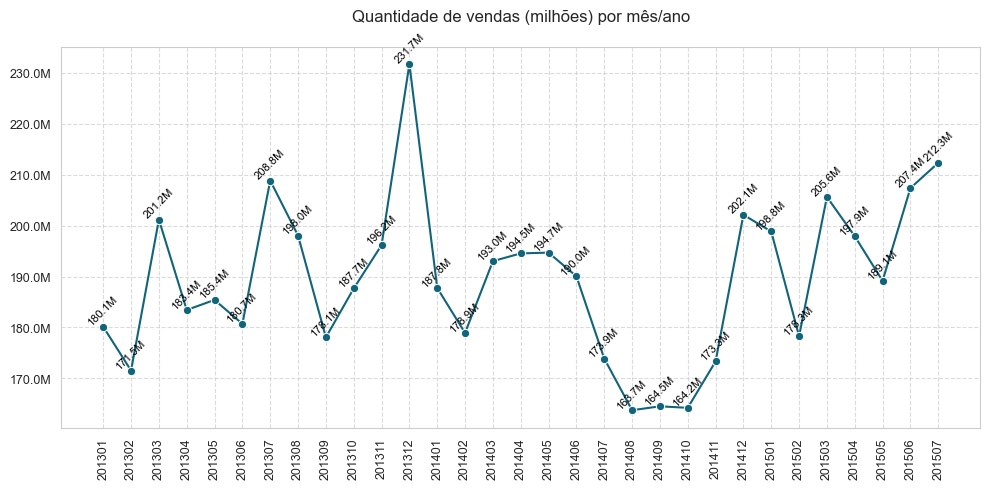

In [122]:
# Criar o gráfico
plt.figure(figsize=(10, 5))

ax = sns.lineplot(data=df_00, x='Year_Month', y='Sales', marker='o', color='#10647b')

# Formatar os números do eixo Y para milhões ou milhares
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.yticks(fontsize=9)

# Título e formatação dos eixos
plt.title(f'Quantidade de vendas (milhões) por mês/ano\n', fontsize=12)
plt.xlabel('')
plt.ylabel('')

# Adicionar rótulos nos pontos do gráfico de linha
for x, y in zip(df_00['Year_Month'], df_00['Sales']):
    ax.text(x, y, formatar_valores(y), color='black', 
            ha='center', va='bottom', fontsize=8, rotation=45)


# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 4.2. Quantidade de vendas e promoções diárias por mês

In [104]:
# Agrupando quantidade de vendas por Mês/Ano
df_01 = df.groupby('Year_Month')[['Sales', 'Promo']].sum().reset_index()

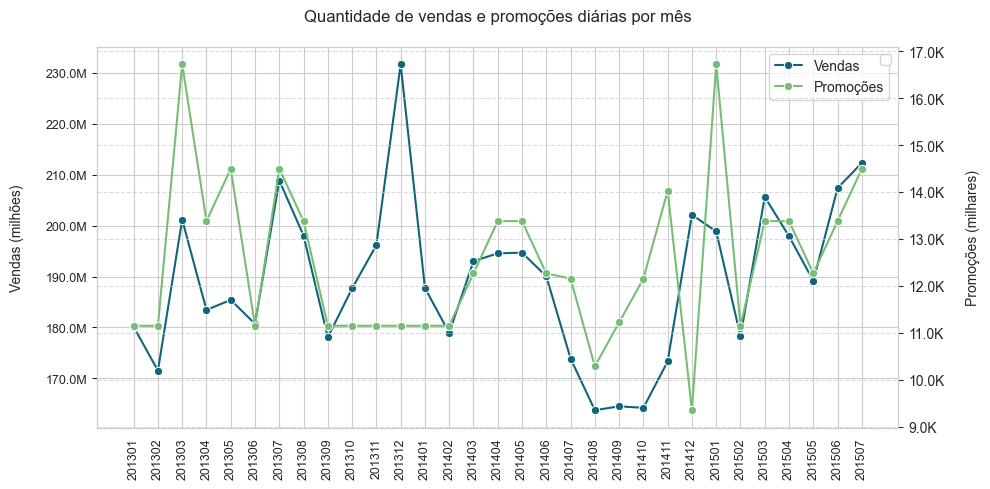

In [129]:
# Criar o gráfico
plt.figure(figsize=(10, 5))

# Primeiro eixo y para 'Sales'
ax1 = sns.lineplot(data=df_01, x='Year_Month', y='Sales', marker='o', 
                   color='#10647b', label='Vendas')
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))
plt.xticks(rotation=90, ha='center', fontsize=9)
plt.yticks(fontsize=9)

# Título e formatação dos eixos
plt.title('Quantidade de vendas e promoções diárias por mês\n', fontsize=12)
plt.xlabel('')
ax1.set_ylabel('Vendas (milhões)\n')

# Segundo eixo y para 'Promo'
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df_01, x='Year_Month', y='Promo', marker='o', 
                   color='#78bd76', label='Promoções')
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))
ax2.set_ylabel('\nPromoções (milhares)')

# Adicionar ambas as legendas (Sales e Promo) no eixo principal
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

# Combinar as legendas em uma só, uma embaixo da outra
ax2.legend('')
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', 
           bbox_to_anchor=(0.83, 1), ncol=1)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### 4.3. Quantidade de vendas por tipo de loja

In [112]:
# Agrupando quantidade de vendas por Mês/Ano
df_02 = df.groupby('StoreType')[['Sales']].sum().reset_index()

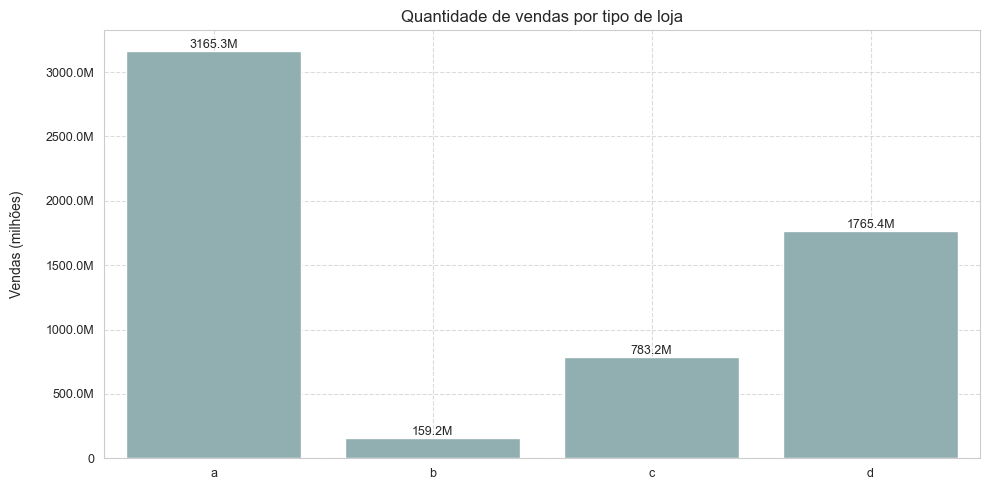

In [128]:
# Criar o gráfico
plt.figure(figsize=(10, 5))

# Plotar o gráfico no eixo fornecido
ax = sns.barplot(data=df_02, x='StoreType', y='Sales', color='#8cb3b6')

# Formatar os números do eixo Y para milhões ou milhares
ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))

# Formatar os rótulos do eixo X
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=9)
# Formatar os rótulos do eixo Y
ax.tick_params(axis='y', labelsize=9)

# Formatação do título
ax.set_title('Quantidade de vendas por tipo de loja', loc='center', fontsize=12)
ax.set(xlabel='', ylabel='Vendas (milhões)\n')

# Adicionar rótulos (valores) nas barras, com a orientação especificada
for container in ax.containers:
    labels = [formatar_valores(val) for val in container.datavalues]
    ax.bar_label(container, labels=labels, size=9, label_type='edge')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()